In [ ]:
!git clone https://github.com/robson-fernandes/dbnlearn

Cloning into 'dbnlearn'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 27 (delta 10), reused 24 (delta 10), pack-reused 0
Unpacking objects: 100% (27/27), 124.99 KiB | 3.68 MiB/s, done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


train_data shape: (7352, 561)
train_inertial_signals shape: (9, 7352, 128)
Epoch 1/10
184/184 [==============================] - 2s 4ms/step - loss: 0.7224
Epoch 2/10
184/184 [==============================] - 1s 4ms/step - loss: 0.2033
Epoch 3/10
184/184 [==============================] - 1s 4ms/step - loss: 0.1587
Epoch 4/10
184/184 [==============================] - 1s 5ms/step - loss: 0.1300
Epoch 5/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1274
Epoch 6/10
184/184 [==============================] - 1s 5ms/step - loss: 0.1218
Epoch 7/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1455
Epoch 8/10
184/184 [==============================] - 1s 5ms/step - loss: 0.0813
Epoch 9/10
184/184 [==============================] - 1s 4ms/step - loss: 0.0633
Epoch 10/10
46/46 [==============================] - 0s 2ms/step


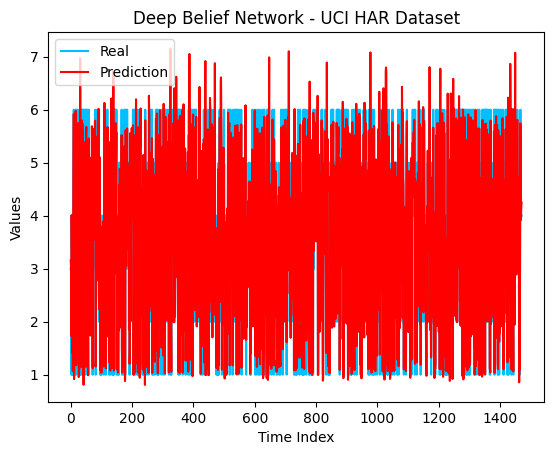

MAPE: 0.0915666412583236


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import os

train_subjects = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/subject_train.txt')
train_data = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/X_train.txt')
train_labels = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/y_train.txt')

test_subjects = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/subject_test.txt')
test_data = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/X_test.txt')
test_labels = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/y_test.txt')


train_inertial_signals = []
test_inertial_signals = []

train_inertial_dir = '/content/drive/MyDrive/UCI_HAR_DATASET/train/Inertial Signals'
test_inertial_dir = '/content/drive/MyDrive/UCI_HAR_DATASET/test/Inertial Signals'

for filename in os.listdir(train_inertial_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(train_inertial_dir, filename)
        data = np.loadtxt(file_path)
        train_inertial_signals.append(data)

for filename in os.listdir(test_inertial_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(test_inertial_dir, filename)
        data = np.loadtxt(file_path)
        test_inertial_signals.append(data)

train_inertial_signals = np.array(train_inertial_signals)
test_inertial_signals = np.array(test_inertial_signals)

print("train_data shape:", train_data.shape)
print("train_inertial_signals shape:", train_inertial_signals.shape)

train_inertial_signals = np.reshape(train_inertial_signals, (train_data.shape[0], -1))
test_inertial_signals = np.reshape(test_inertial_signals, (test_data.shape[0], -1))


train_data = np.concatenate((train_data, train_subjects[:, np.newaxis], train_inertial_signals), axis=1)
test_data = np.concatenate((test_data, test_subjects[:, np.newaxis], test_inertial_signals), axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_data = scaler.transform(test_data)

input_dim = X_train.shape[1]
hidden_layers = [200, 100, 50]

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(input_dim,)))

for units in hidden_layers:
    model.add(keras.layers.Dense(units, activation='relu'))

model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

predictions = model.predict(X_test)

df_validation = pd.DataFrame({'real': y_test, 'prediction': predictions.flatten()})

plt.plot(df_validation['real'], color='deepskyblue', label='Real')
plt.plot(df_validation['prediction'], color='red', label='Prediction')
plt.title('Deep Belief Network - UCI HAR Dataset')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend()
plt.show()

mape = mean_absolute_percentage_error(y_test, predictions.flatten())
print("MAPE:", mape)


Epoch 0: Training Loss = 0.18159455060958862
Epoch 10: Training Loss = 0.07793573290109634
Epoch 20: Training Loss = 0.05063300579786301
Epoch 30: Training Loss = 0.03718110918998718
Epoch 40: Training Loss = 0.018005574122071266
Epoch 50: Training Loss = 0.019627830013632774
Epoch 60: Training Loss = 0.014853415079414845
Epoch 70: Training Loss = 0.019842486828565598
Epoch 80: Training Loss = 0.005877360701560974
Epoch 90: Training Loss = 0.009234605357050896


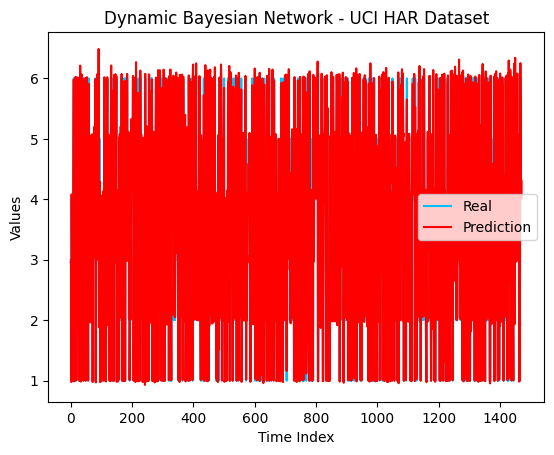

MAPE: 0.025883312514923394


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import os

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load UCI HAR dataset
train_subjects = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/subject_train.txt')
train_data = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/X_train.txt')
train_labels = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/train/y_train.txt')

test_subjects = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/subject_test.txt')
test_data = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/X_test.txt')
test_labels = np.loadtxt('/content/drive/MyDrive/UCI_HAR_DATASET/test/y_test.txt')

# Load inertial signals
train_inertial_signals = []
test_inertial_signals = []

train_inertial_dir = '/content/drive/MyDrive/UCI_HAR_DATASET/train/Inertial Signals'
test_inertial_dir = '/content/drive/MyDrive/UCI_HAR_DATASET/test/Inertial Signals'

for filename in os.listdir(train_inertial_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(train_inertial_dir, filename)
        data = np.loadtxt(file_path)
        train_inertial_signals.append(data)

for filename in os.listdir(test_inertial_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(test_inertial_dir, filename)
        data = np.loadtxt(file_path)
        test_inertial_signals.append(data)

train_inertial_signals = np.array(train_inertial_signals)
test_inertial_signals = np.array(test_inertial_signals)

# Reshape the inertial signals to match the dimensions of train_data and test_data
train_inertial_signals = np.reshape(train_inertial_signals, (train_data.shape[0], -1))
test_inertial_signals = np.reshape(test_inertial_signals, (test_data.shape[0], -1))

# Combine data
train_data = np.concatenate((train_data, train_subjects[:, np.newaxis], train_inertial_signals), axis=1)
test_data = np.concatenate((test_data, test_subjects[:, np.newaxis], test_inertial_signals), axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_data = scaler.transform(test_data)

# Create a DBN using TensorFlow
n_visible = X_train.shape[1]  # Number of visible units
n_hidden = [200, 100, 50]  # Number of hidden units in each layer

# Define placeholders for input and target
x = tf.compat.v1.placeholder(tf.float32, shape=[None, n_visible])
y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1])

# Create the RBM layers
rbm_layers = []
rbm_input = x
rbm_input_size = n_visible

for i, n in enumerate(n_hidden):
    rbm_output = tf.keras.layers.Dense(units=n, activation='relu')(rbm_input)
    rbm_layers.append(rbm_output)
    rbm_input = rbm_output
    rbm_input_size = n

# Output layer
output_layer = tf.keras.layers.Dense(units=1, activation='linear')(rbm_layers[-1])

# Define the loss function and optimizer
loss = tf.reduce_mean(tf.square(output_layer - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Train the DBN
# Train the DBN
epochs = 100
batch_size = 32

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(epochs):
        num_batches = len(X_train) // batch_size
        for batch in range(num_batches):
            batch_start = batch * batch_size
            batch_end = (batch + 1) * batch_size
            batch_x = X_train[batch_start:batch_end]
            batch_y = y_train[batch_start:batch_end]
            batch_y = np.expand_dims(batch_y, axis=1)  # Add an extra dimension

            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        if epoch % 10 == 0:
            train_loss = sess.run(loss, feed_dict={x: X_train, y: np.expand_dims(y_train, axis=1)})
            print(f"Epoch {epoch}: Training Loss = {train_loss}")

    # Predict values
    predictions = sess.run(output_layer, feed_dict={x: X_test})

# Plot Real vs Predict
df_validation = pd.DataFrame({'real': y_test.flatten(), 'prediction': predictions.flatten()})

plt.plot(df_validation['real'], color='deepskyblue', label='Real')
plt.plot(df_validation['prediction'], color='red', label='Prediction')
plt.title('Dynamic Bayesian Network - UCI HAR Dataset')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions.flatten())
print("MAPE:", mape)




In [ ]:
!git clone https://github.com/albertbup/deep-belief-network.git


Cloning into 'deep-belief-network'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 798 (delta 13), reused 20 (delta 9), pack-reused 763
Receiving objects: 100% (798/798), 183.45 KiB | 4.59 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [ ]:
%cd deep-belief-network


/content/deep-belief-network


In [ ]:
pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 95.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement tensorflow==1.5.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching dis